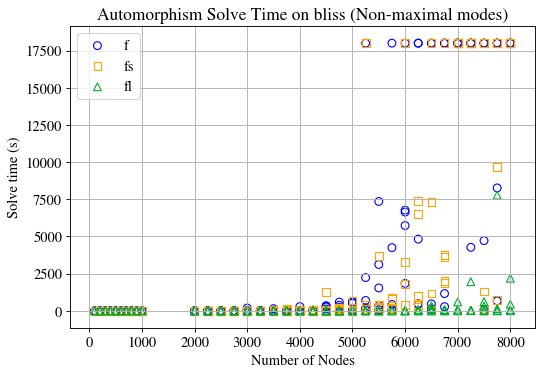

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['axes.grid'] = 'true'

def clean_time(s):
    s = s.replace("Total time:", "")
    s = s.replace(" seconds\n", "")
    s = s.strip()
    return float(s)

def clean_size(s):
    return int(s[-5:])

INF = 5 * 3600

modes = ["f", "fs", "fl", "fm", "flm", "fsm"]
markers = {"f": "o", "fs": "s", "fl": "^"}
colours = {"f": "blue", "fs": "orange", "fl": "#02ab2e"}

bliss_times = dict()

for sh in modes:
    sizes = []
    mode_times = []
    
    f = open("data/summary_%s.txt" % sh, "r")
    l = f.readlines()
    
    for i in range(len(l)):
        if not(l[i].startswith("Total time:")):
            sizes.append(clean_size(l[i]))
            mode_times.append(INF)
        else:
            mode_times[-1] = clean_time(l[i])
    
    bliss_times[sh] = mode_times

# non-maximal modes
fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

for sh in ["f", "fs", "fl"]:
    ax.scatter(sizes, bliss_times[sh], label=sh, marker=markers[sh], facecolors='None', edgecolors=colours[sh])
    if sh == "fl":
        ax.set_title("Automorphism Solve Time on bliss (Non-maximal modes)")
        ax.set_ylabel("Solve time (s)")
        ax.set_xlabel("Number of Nodes")
        ax.legend()
        plt.show()

fig.savefig("exports/bliss_non_maximal_times.pdf", bbox_inches='tight')

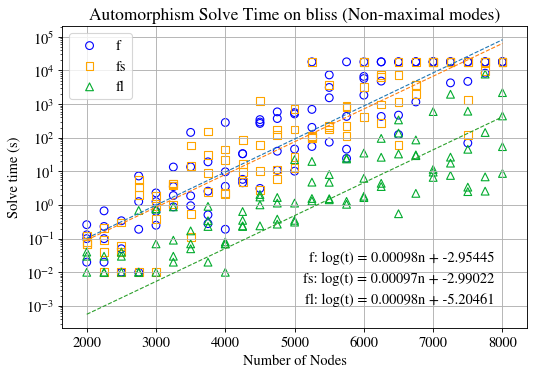

In [3]:
# non-maximal modes
fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

eps = 1e-10

eqn_coords = dict()
eqn_coords["f"] = (0.93, 0.212)
eqn_coords["fs"] = (0.93, 0.142)
eqn_coords["fl"] = (0.93, 0.072)

for sh in ["f", "fs", "fl"]:
    ax.scatter(sizes[45:], bliss_times[sh][45:], label=sh, marker=markers[sh], facecolors='None', edgecolors=colours[sh])
    log_bliss_times = np.log10(np.array(bliss_times[sh]) + eps)
    
    # find linear best fit to log graph
    fit_coeff = np.polyfit(sizes[45:], log_bliss_times[45:], 1)
    fit_line = 10 ** (np.array(sizes[45:]) * fit_coeff[0] + fit_coeff[1])
    ax.plot([sizes[45], sizes[-1]], [fit_line[0], fit_line[-1]], linestyle="dashed")
    ax.text(eqn_coords[sh][0], eqn_coords[sh][1], "%s: log(t) = %.5fn + %.5f" % (sh, fit_coeff[0], fit_coeff[1]),
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax.transAxes, fontsize=13)
ax.set_title("Automorphism Solve Time on bliss (Non-maximal modes)")
ax.set_yscale("log")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")
ax.legend()
plt.show()

fig.savefig("exports/bliss_non_maximal_log_times.pdf", bbox_inches='tight')

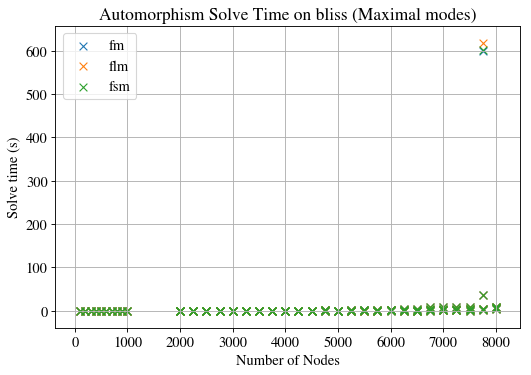

In [4]:
# maximal modes
fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

for sh in ["fm", "flm", "fsm"]:
    ax.scatter(sizes, bliss_times[sh], label=sh, marker='x')
ax.set_title("Automorphism Solve Time on bliss (Maximal modes)")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")
ax.legend()
plt.show()

fig.savefig("exports/bliss_maximal_times.pdf", bbox_inches='tight')
